# Probability and Distributions

Based on https://github.com/cs109/2015lab3/blob/master/Lab3-probability.ipynb

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

**Simulating the results of the model**

We dont have a coin right now. So let us simulate this process on a computer. To do this we will use a form of the random number generator built into numpy. In particular, we will use the function np.random.choice, which will with equal probability for all items pick an item from a list (thus if the list is of size 6, it will pick one of the six list items each time, with a probability 1/6).

In [2]:
def throw_a_coin(N):
    return np.random.choice(['H', 'T'], size=N)
throws = throw_a_coin(40)
print("Throws:"," ".join(throws))
print("Number of heads:",np.sum(throws=='H'))
print("p1 = Number of Heads/Total Throws:",np.sum(throws=='H')/40.)

Throws: T H T T T H T H T T H T H H H T H T T H T H H T H T H H H T T T H T T H H T T H
Number of heads: 19
p1 = Number of Heads/Total Throws: 0.475



Notice that you do not necessarily get 20 heads.

Now say that we run the entire process again, a second replication to obtain a second sample. Then we ask the same question: what is the fraction of heads we get this time? Lets call the odds of heads in sample 2, then, $p_2$:

In [3]:
throws = throw_a_coin(40)
print("Throws:"," ".join(throws))
print("Number of heads:",np.sum(throws=='H'))
print("p2 = Number of Heads/Total Throws:",np.sum(throws=='H')/40.)

Throws: T T H T H T H T T T H T H T T H H T H H T H T T T H T H H T T T T H T T T H T H
Number of heads: 16
p2 = Number of Heads/Total Throws: 0.4


In [4]:
throws = throw_a_coin(10000)
print("First 10000 throws:"," ".join(throws)[:1000])
print("Number of heads:",np.sum(throws=='H'))
print("p for 10,000 = Number of Heads/Total Throws:",np.sum(throws=='H')/10000.)

First 10000 throws: H H H H T H H T H T H T T H T T H H H H H T H T H H H H H T H T T T H T H T H T H T T T T T T T H H H T T H H T H H H T T H T H H H H T T T T T H H H T H T T H H T H H T H H H T T T H H H H T T H T T H T H H H H T T H H T T H T H H T T T T H T H T H H T H T H T H T H T T T T T T T T H T H T H H T H H H H H H T T T T H H T T T H H T H H H H H H H H H H H T T T T T T H T T H H T T T T T T T T H T T H T H T H H T H H H T T T T H H T H H T T T H H T H H T T H H T H H H T H H T T T H T T H H H H T T H T H T T T T H T H T H T H T T H T T H H T T H H H T T H H T T H T T T H H T H T H H T T H T T H H T H H T T H H H T H T T T H T H T T T H H T H H H T T H H H T H H H T T H T H H H T T H T H H H H H H T T H T T T H T H T T T T H H T T T T H H H H T H T H H H H T T H T H H T T H T H T T T H T T H H T T H H H H T T H H H T T T T H T H H T T T H T H H T T T T H H T H T T H H T H H T H H T H T H H H H H H T T T H H T T T H H T T H T T T T H T H H H H H T H H T T T T T T T H T T 

The larger number of trials we do, the closer we seem to get to half the tosses showing up heads. Lets see this more systematically:

Text(0.5,1,'frequentist probability of heads')

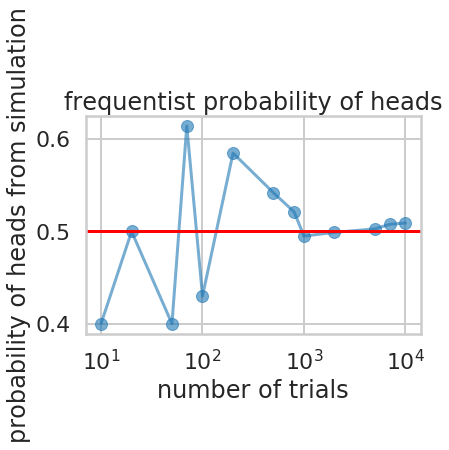

In [5]:
trials = [10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6)
plt.xscale('log')
plt.axhline(0.5, 0, 1, color='r')
plt.xlabel('number of trials')
plt.ylabel('probability of heads from simulation')
plt.title('frequentist probability of heads')

Thus, the true odds fluctuate about their long-run value of 0.5, in accordance with the model of a fair coin (which we encoded in our simulation by having np.random.choice choose between two possibilities with equal probability), with the fluctuations becoming much smaller as the number of trials increases. These fluctations are what give rise to probability distributions.

Each finite length run is called a sample, which has been obtained from the generative model of our fair coin. Its called generative as we can use the model to generate, using simulation, a set of samples we can play with to understand a model.

### A simple Election Model

In the last section, we made a simple simulation of a coin-toss on the computer from a fair-coin model which associated equal probability with heads and tails. Let us consider another model here, a table of probabilities that PredictWise made on October 2, 2012 for the US presidential elections. PredictWise aggregated polling data and, for each state, estimated the probability that the Obama or Romney would win. Here are those estimated probabilities:

In [6]:
predictwise = pd.read_csv('predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


Each row is the probability predicted by Predictwise that Romney or Obama would win a state. The votes column lists the number of electoral college votes in that state.

Remember that simulation is used in different ways in the modelling process. Simulations might be used to propagate differential equations which describe the weather from different initial conditions. In this case they are used to create the model. In the coin flips case, they are used to illustrate the predictions of the model of a fair coin. This example is in the same spirit: we are given a (somehow obtained) list of win probabilities for the states of the US.

In the case of the tossed coins, even though we had a model which said that the probability of heads was 0.5, there were sequences of flips in which more or less than half the flips were heads. Similarly, here, if the probability of Romney winning in Arizona is 0.938, it means that if somehow, there were 10000 replications with an election each, Romney would win in 938 of those Arizonas on the average across the replications. And there would be some samples with Romney winning more, and some with less. We can run these simulated universes on a computer though not in real life.



**Simulating the model**

To do this, we will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Obama is given by the Predictwise state-wise win probabilities. Lets write a function simulate_election that uses this predictive model to simulate the outcome of the election given a table of probabilities.

In the code below, each column simulates a single outcome from the 50 states + DC by choosing a random number between 0 and 1. Obama wins that simulation if the random number is $<$ the win probability. If he wins that simulation, we add in the electoral votes for that state, otherwise we dont. We do this n_sim times and return a list of total Obama electoral votes in each simulation.

In [7]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)

The following code takes the necessary probabilities for the Predictwise data, and runs 10000 simulations. If you think of this in terms of our coins, think of it as having 51 biased coins, one for each state, and tossing them 10,000 times each.

We use the results to compute the number of simulations, according to this predictive model, that Obama wins the election (i.e., the probability that he receives 269 or more electoral college votes)

In [8]:
result = simulate_election(predictwise, 10000)
print((result >= 269).sum())

9960


In [9]:
result

array([314, 358, 285, ..., 314, 345, 305])

**Displaying the prediction**

Now, lets visualize the simulation. We will build a histogram from the result of simulate_election. We will normalize the histogram by dividing the frequency of a vote tally by the number of simulations. We'll overplot the "victory threshold" of 269 votes as a vertical black line and the result (Obama winning 332 votes) as a vertical red line.

We also compute the number of votes at the 5th and 95th quantiles, which we call the spread, and display it (this is an estimate of the outcome's uncertainty). By 5th quantile we mean that if we ordered the number of votes Obama gets in each simulation in increasing order, the 5th quantile is the number below which 5\% of the simulations lie.

We also display the probability of an Obama victory

In [10]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100.)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

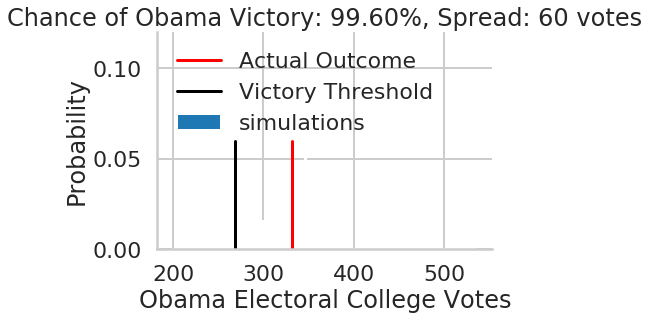

In [11]:
plot_simulation(result)

The model created by combining the probabilities we obtained from Predictwise with the simulation of a biased coin flip corresponding to the win probability in each states leads us to obtain a histogram of election outcomes. We are plotting the probabilities of a prediction, so we call this distribution over outcomes the predictive distribution. Simulating from our model and plotting a histogram allows us to visualize this predictive distribution. In general, such a set of probabilities is called a probability distribution or probability mass function.

## Random Variables

#### Bernoulli Random Variables (in scipy.stats)

The Bernoulli Distribution represents the distribution for coin flips. Let the random variable X represent such a coin flip, where X=1 is heads, and X=0 is tails. Let us further say that the probability of heads is p (p=0.5 is a fair coin).

We then say:

$$X \sim Bernoulli(p),$$

which is to be read as X has distribution Bernoulli(p).

In [12]:
from scipy.stats import bernoulli

#bernoulli random variable
brv=bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

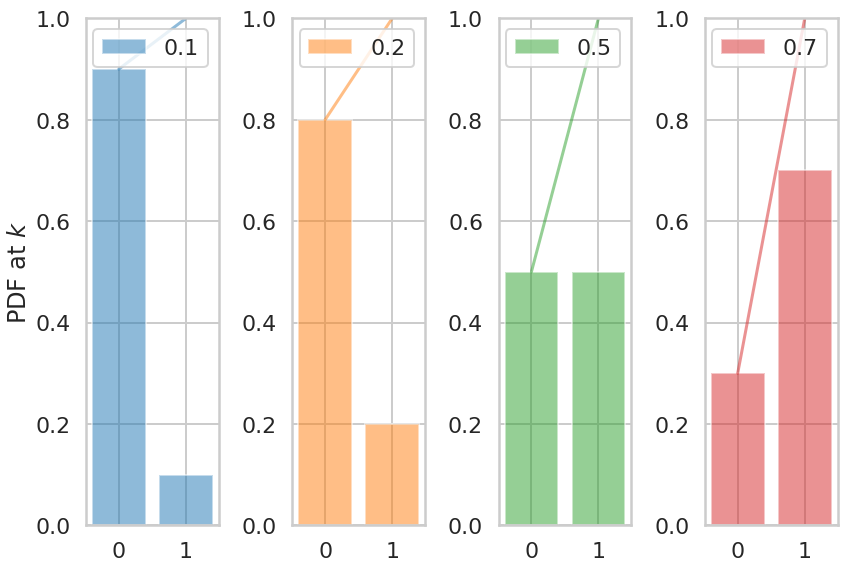

In [13]:
event_space=[0,1]
plt.figure(figsize=(12,8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()

Let us parse the intent of the above code a bit. We run 10,000 simulations. In each one of these simulations, we toss 51 biased coins, and assign the vote to obama is the output of np.random.uniform is less than the probablity of an obama win.

### Uniform Distribution (in numpy)

The first thing to pick up on here is that np.random.uniform gives you a random number between 0 and 1, uniformly. In other words, the number is equally likely to be between 0 and 0.1, 0.1 and 0.2, and so on. This is a very intuitive idea, but it is formalized by the notion of the Uniform Distribution.

We then say:

$$X \sim Uniform([0,1),$$
which is to be read as X has distribution Uniform([0,1]).

### Empirical Distribution

This is an empirical Probability Mass Function or Probability Density Function. The word density is strictly used when the random variable X takes on continuous values, as in the uniform distribution, rather than discrete values such as here, but we'll abuse the language and use the word probability distribution in both cases.

Lets summarize: the way the density arose here that we did ran 10,000 tosses (for each state), and depending on the value, assigned the state to Obama or Romney, and then summed up the electoral votes over the states.

There is a second, very useful question, we can ask of any such probability density: what is the probability that a random variable is less than some value. In other words: $P(X < x)$. This is also a probability distribution and is called the Cumulative Distribution Function, or CDF (sometimes just called the distribution, as opposed to the density). Its obtained by "summing" the probability density function for all $X$ less than $x$.

In [14]:
CDF = lambda x: np.float(np.sum(result < x)) / result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print("Obama win CDF at votes=", votes," is ", CDF(votes))

Obama win CDF at votes= 200  is  0.0
Obama win CDF at votes= 300  is  0.1511
Obama win CDF at votes= 320  is  0.449
Obama win CDF at votes= 340  is  0.8417
Obama win CDF at votes= 360  is  0.9978
Obama win CDF at votes= 400  is  1.0
Obama win CDF at votes= 500  is  1.0


Text(0,0.5,'probability of Obama win')

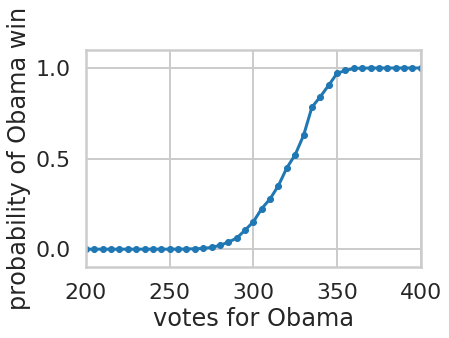

In [15]:
votelist = np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-')
plt.xlim([200,400])
plt.ylim([-0.1, 1.1])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama win")

### Binomial Distribution (in scipy.stats)

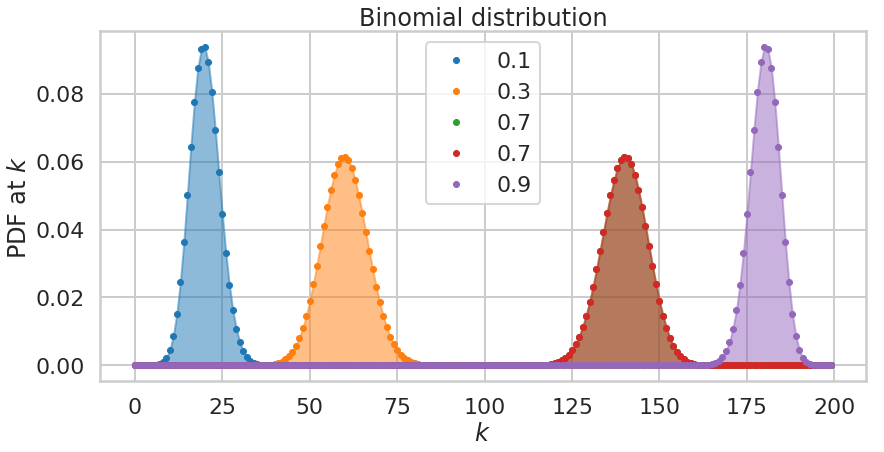

In [16]:
from scipy.stats import binom

plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.7, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q = plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q = plt.ylabel("PDF at $k$")
q = plt.xlabel("$k$")

**The sampling distribution as a function of sample size**

We can see what the estimated sampling distribution of the mean looks like at different sample sizes.

In [17]:
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

sample_sizes=np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]
mean_of_sample_means = [np.mean(means) for means in sample_means]

sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

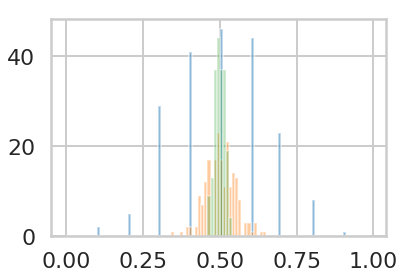

In [18]:
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5);
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4);
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3);

# Frequentism, Samples, and the Bootstrap.

## DATA AND MODELS

### Why do we do this? Lets get some data...

Forty-four babies -- a new record -- were born in one 24-hour period at the Mater Mothers' Hospital in Brisbane, Queensland, Australia, on December 18, 1997. For each of the 44 babies, The Sunday Mail recorded the time of birth, the sex of the child, and the birth weight in grams. Also included is the number of minutes since midnight for each birth.

REFERENCE: Steele, S. (December 21, 1997), "Babies by the Dozen for Christmas: 24-Hour Baby Boom," The Sunday Mail (Brisbane), p. 7.

"Datasets and Stories" article "A Simple Dataset for Demonstrating Common Distributions" in the Journal of Statistics Education (Dunn 1999).

Columns

   1 -  8  Time of birth recorded on the 24-hour clock
   9 - 16  Sex of the child (1 = girl, 2 = boy)
  17 - 24  Birth weight in grams
  25 - 32  Number of minutes after midnight of each birth

In [19]:
df = pd.read_csv("babyboom.dat.txt", header=None, sep='\s+', names=['24hrtime', 'sex', 'weight', 'minutes'])

In [20]:
df.head()

,24hrtime,sex,weight,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [21]:
df.minutes.mean()

788.7272727272727

#### What is data?

In [22]:
# calculating correlation
df.corr()

,24hrtime,sex,weight,minutes
24hrtime,1.000000,0.028027,0.075636,0.999840
sex,0.028027,1.000000,0.228751,0.031815
weight,0.075636,0.228751,1.000000,0.079616
minutes,0.999840,0.031815,0.079616,1.000000


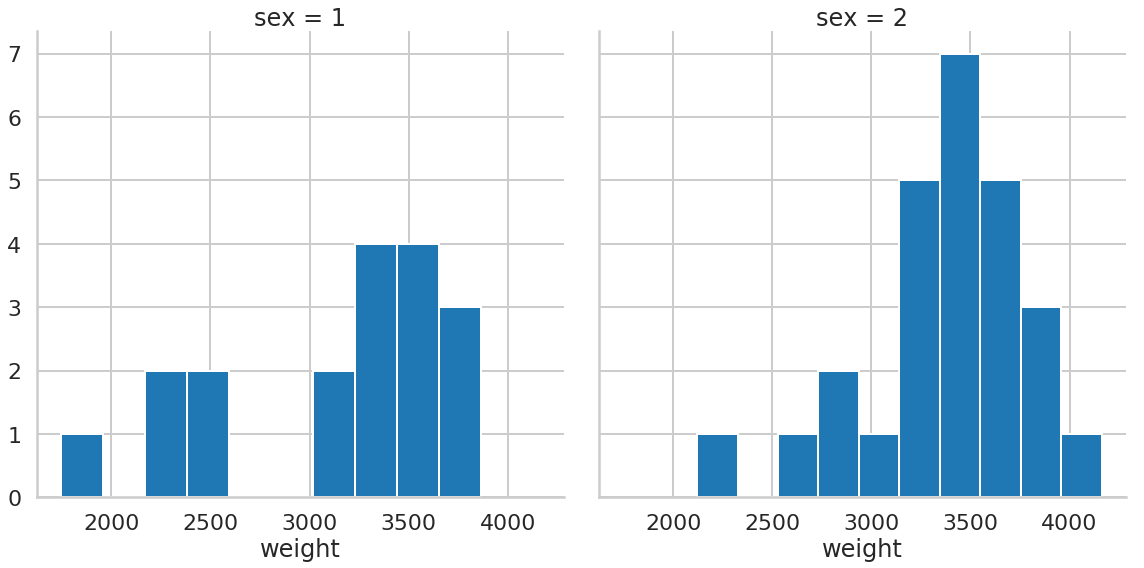

In [23]:
g = sns.FacetGrid(col='sex', data=df, height=8)
g.map(plt.hist, 'weight')


#### Samples vs population

But we have never asked ourselves the philosophical question: what is data? Frequentist statistics is one answer to this philosophical question. It treats data as a sample from an existing population.

This notion is probably clearest to you from elections, where some companies like Zogby or CNN take polls. The sample in these polls maybe a 1000 people, but they "represent" the electoral population at large. We attempt to draw inferences about how the population will vote based on these samples.

Choosing a model
Let us characterize our particular sample statistically then, using a probability distribution

The Exponential Distribution
The exponential distribution occurs naturally when describing the lengths of the inter-arrival times in a homogeneous Poisson process.

It takes the form: $$
f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} &amp; x \ge 0, \\
0 &amp; x &lt; 0.
\end{cases}
$$

From Wikipedia: In probability theory, a Poisson process is a stochastic process which counts the number of events and the time that these events occur in a given time interval. The time between each pair of consecutive events has an exponential distribution with parameter $\lambda$ and each of these inter-arrival times is assumed to be independent of other inter-arrival times. The process is named after the French mathematician Siméon Denis Poisson and is a good model of radioactive decay, telephone calls and requests for a particular document on a web server, among many other phenomena.

In our example above, we have the arrival times of the babies. There is no reason to expect any specific clustering in time, so one could think of modelling the arrival of the babies via a poisson process.

Furthermore, the Poisson distribution can be used to model the number of births each hour over the 24-hour period.

Text(0,0.5,'exponential pdf')

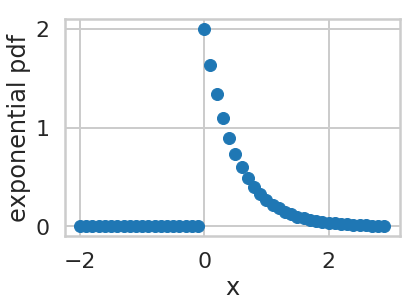

In [24]:
f = lambda x, l: l*np.exp(-l*x)*(x>0)
xpts = np.arange(-2, 3, 0.1)
plt.plot(xpts, f(xpts, 2), 'o')
plt.xlabel('x')
plt.ylabel('exponential pdf')

Text(0.5,1,'Probability density function of an exponential random variable;\\differing $\\lambda$')

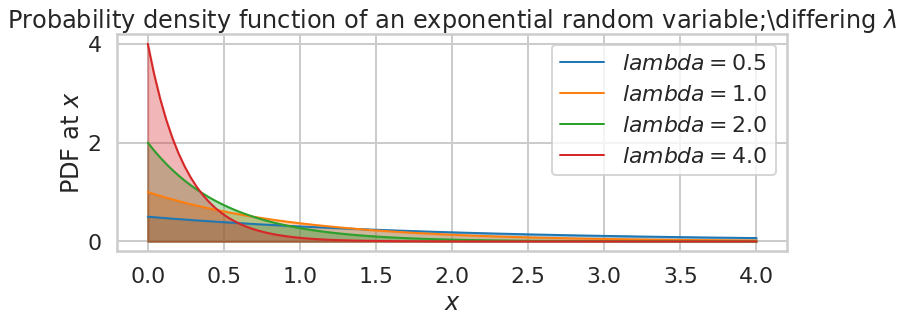

In [25]:
from scipy.stats import expon

x = np.linspace(0, 4, 100)
colors = sns.color_palette()

lambda_ = [.5, 1, 2, 4]
plt.figure(figsize=(12, 4))
for l,c in zip(lambda_, colors):
    plt.plot(x, expon.pdf(x, scale=1./l), lw=2,
                color=c, label="$lambda = %.1f$"%l)
    plt.fill_between(x, expon.pdf(x, scale=1./l), color=c, alpha=.33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an exponential random variable;\differing $\lambda$")

### How would we draw from this distribution?

Lets use the built in machinery in scipy.stats:

Text(0.5,1,'Exponential pdf and normalized samples')

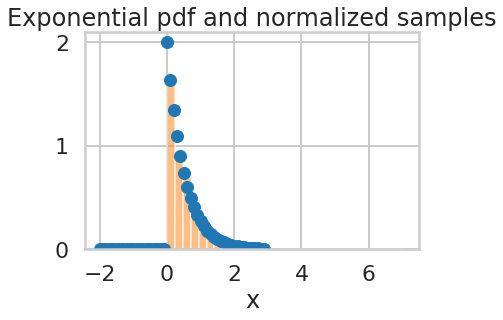

In [26]:
from scipy.stats import expon

plt.plot(xpts, expon.pdf(xpts, scale=1./2.), 'o')
plt.hist(expon.rvs(size=1000, scale=1./2.), normed=True, alpha=.5, bins=30)
plt.xlabel("x")
plt.title("Exponential pdf and normalized samples")

In scipy.stats, you can alternatively create a frozen object, which holds values of things like the scale

Text(0.5,1,'Exponential pdf and normalized samples')

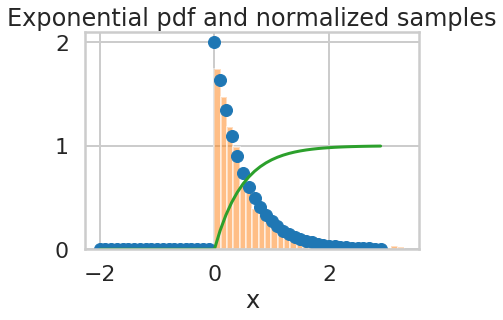

In [27]:
rv = expon(scale=0.5)
plt.plot(xpts, rv.pdf(xpts), 'o')
plt.hist(rv.rvs(size=1000), normed=True, alpha=.5, bins=30)
plt.plot(xpts, rv.cdf(xpts))
plt.xlabel("x")
plt.title("Exponential pdf and normalized samples")

### Understanding our data using a distribution

Lets play with our data a bit to understand it:

The first birth occurred at 0005, and the last birth in the 24-hour period at 2355. Thus the 43 inter-birth times happened over a 1430-minute period, giving a theoretical mean of 1430/43 = 33.26 minutes between births.

Lets plot a histogram of the inter-birth times

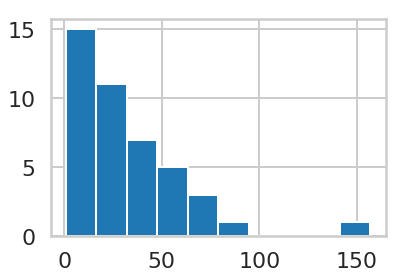

In [28]:
timediffs = df.minutes.diff()[1:]
timediffs.hist(bins=10)

The mean or of an exponentially distributed random variable X with rate parameter $\lambda$ can be analytically calculated as

$$Ex[X] = \frac{1}{\lambda}.$$
This makes intuitive sense: if you get babies at an average rate of 2 per hour, then you can expect to wait half an hour for every baby.

The variance of X is given by

$$Var[X] = \frac{1}{\lambda^2}.$$
so the standard deviatiation is equal to the mean, just as in the discrete Poisson distribution.

In [29]:
lambda_from_mean = 1./timediffs.mean()
print(lambda_from_mean, 1./lambda_from_mean)

0.03006993006993007 33.25581395348837


Text(0.5,1,'Normalized data and model estimated $\\hat{\\lambda}$')

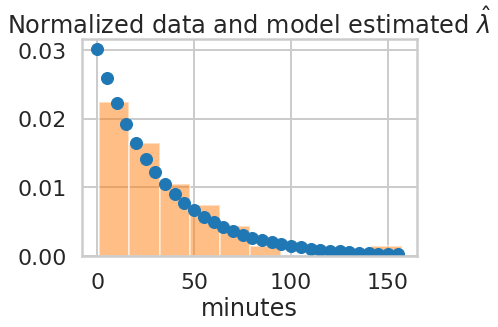

In [30]:
minutes = np.arange(0, 160, 5)
rv = expon(scale=1./lambda_from_mean)
plt.plot(minutes, rv.pdf(minutes), 'o')
timediffs.hist(normed=True, alpha=.5)
plt.xlabel('minutes')
plt.title("Normalized data and model estimated $\hat{\lambda}$")

What did we just do? We made a 'point estimate' of the scale or rate parameter as a compression of our data. But what does it mean to make such a point estimate?

**An aside: The Poisson Distribution**

The Poisson Distribution is defined for all positive integers:

$$P(Z=k)=\frac{\lambda^k e^{−\lambda}}{k!}, k=0,1,2,... $$

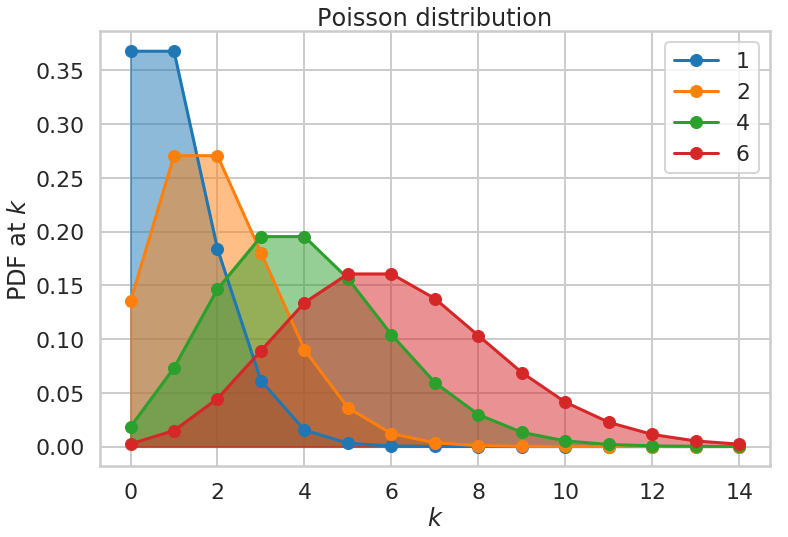

In [31]:
from scipy.stats import poisson

k = np.arange(15)
plt.figure(figsize=(12, 8))
for i, lambda_ in enumerate([1, 2, 4, 6]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$");

In [32]:
per_hour = df.minutes // 60
num_births_per_hour = df.groupby(per_hour).minutes.count()

num_births_per_hour

minutes
0     1
1     3
2     1
4     4
7     2
8     2
9     1
10    3
11    1
12    2
13    1
14    4
15    1
16    2
17    1
18    3
19    4
20    3
21    2
22    1
23    2
Name: minutes, dtype: int64

In [33]:
num_births_per_hour.mean()

2.0952380952380953

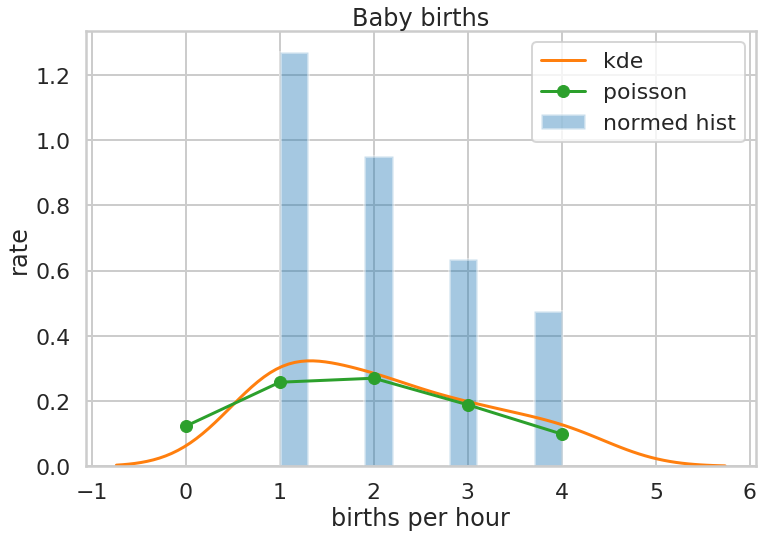

In [34]:
k = np.arange(5)
plt.figure(figsize=(12,8))
tcount=num_births_per_hour.sum()
plt.hist(num_births_per_hour, alpha=0.4,  lw=3, normed=True, label="normed hist")
sns.kdeplot(num_births_per_hour, label="kde")
plt.plot(k, poisson.pmf(k, num_births_per_hour.mean()), '-o',label="poisson")
plt.title("Baby births")
plt.xlabel("births per hour")
plt.ylabel("rate")
plt.legend()

## FREQUENTIST STATISTICS

**Segue: many samples on the binomial**

In [35]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

The function below returns the mean for each sample in an ensemble of samples

In [36]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

Let us now do 200 replications, each of which has a sample size of 1000 flips, and store the 200 means for each sample size from 1 to 1000 in sample_means. This will rake some time to run as I am doing it for 200 replications at 1000 different sample sizes.

In [37]:
sample_sizes = np.arange(1,1001,1)

sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

In [38]:
So remember that for eachsample size, i am getting 200 means. Lets get the mean of the means at each sample size.

SyntaxError: invalid syntax (<ipython-input-38-ee2865b7cf43>, line 1)

In [ ]:
mean_of_sample_means = [np.mean(means) for means in sample_means]

In [ ]:
plt.plot(sample_sizes, mean_of_sample_means)
plt.ylim([.48, .52])

Not surprisingly, the mean of the sample means converges to the distribution mean as the sample size N gets very large.

### The notion of a Sampling Distribution

(some text is quoted from Murphy's machine learning book)

In data science, we are always interested in understanding the world from incomplete data, in other words from a sample or a few samples of a population at large. Our experience with the world tells us that even if we are able to repeat an experiment or process, we will get more or less different answers the next time. If all of the answers were very different each time, we would never be able to make any predictions.

But some kind of answers differ only a little, especially as we get to larger sample sizes. So the important question then becomes one of the distribution of these quantities from sample to sample, also known as a sampling distribution.

Since, in the real world, we see only one sample, this distribution helps us do inference, or figure the uncertainty of the estimates of quantities we are interested in. If we can somehow cook up samples just somewhat different from the one we were given, we can calculate quantities of interest, such as the mean on each one of these samples. By seeing how these means vary from one sample to the other, we can say how typical the mean in the sample we were given is, and whats the uncertainty range of this quantity. This is why the mean of the sample means is an interesting quantity; it characterizes the sampling distribution of the mean, or the distribution of sample means.

So, in the babies case, the uncertainty in the parameter estimate can be measured by computing the sampling distribution of the estimator. What you are doing is sampling many Data Sets $D_i$ from the true population (which we are not given you will argue, and you are right, but just wait a bit), say M of them, each of size N, from some true model $p(\cdot | \trueval{\lambda})$. We will now calculate M $\est{\lambda}_i$, one for each dataset. As we let $M \rightarrow \infty$, the distribution induced on $\est{\lambda}$ is the sampling distribution of the estimator.

In [ ]:
### Inference

Just having an estimate is no good. We will want to put confidence intervals on the estimation of the parameters. This presents a conundrum: we have access to only one sample, but want to compute a error estimate over multiple samples, using an estimator such as the standard deviation.

At this point we are wishing for the Lord to have given us those other samples drawn from the population that we talked about above. But alas, no such luck...

In the last two decades, resampling the ONE dataset we have has become computationally feasible. Resampling involves making new samples from the observations, each of which is analysed in the same way as out original dataset. One way to do this is the Bootstrap.

Bootstrap
Bootstrap tries to approximate our sampling distribution. If we knew the true parameters of the population, we could generate M fake datasets. Then we could compute the parameter (or another estimator) on each one of these, to get a empirical sampling distribution of the parameter or estimator, and which will give us an idea of how typical our sample is, and thus, how good our parameter estimations from our sample are. (again from murphy)

But we dont have the true parameter. So we generate these samples, using the parameter we calculated. Or, alteratively, we sample with replacement the X from our original sample D, generating many fake datasets, and then compute the distribution on the parameters as before.

We do it here for the mean of the time differences. We could also do it for its inverse, $\lambda$.



In [ ]:
**Non Parametric bootstrap**

Resample the data! We can then plot the distribution of the mean time-difference.

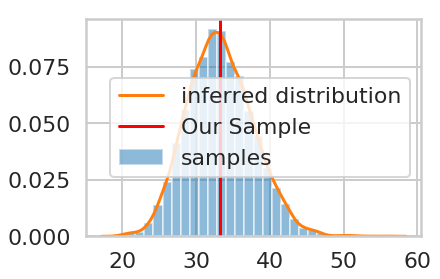

In [39]:
M_samples = 10000
N_points = timediffs.shape[0]
bs_np = np.random.choice(timediffs, size=(M_samples, N_points))
sd_mean = np.mean(bs_np, axis=1)
sd_std = np.std(bs_np, axis=1)
plt.hist(sd_mean, bins=30, normed=True, alpha=.5, label="samples")
sns.kdeplot(sd_mean, label="inferred distribution")
plt.axvline(timediffs.mean(), 0, 1, color='r', label='Our Sample')
plt.legend()

**Parametric Bootstrap**

And here we do it in a parametric way. We get an "estimate" of the parameter from our sample, and them use the exponential distribution to generate many datasets, and then fir the parameter on each one of those datasets. We can then plot the distribution of the mean time-difference.

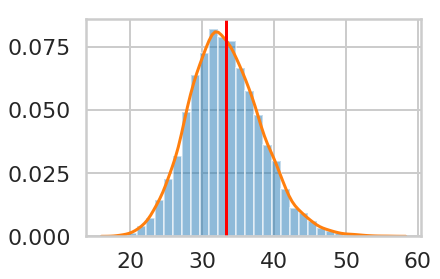

In [40]:
rv = expon(scale=1./lambda_from_mean)
M_samples=10000
N_points = timediffs.shape[0]
bs_p = rv.rvs(size=(M_samples, N_points))
sd_mean_p=np.mean(bs_p, axis=1)
sd_std_p=np.std(bs_p, axis=1)
plt.hist(sd_mean_p, bins=30, normed=True, alpha=0.5);
sns.kdeplot(sd_mean_p);
plt.axvline(timediffs.mean(), 0, 1, color='r', label='Our Sample')